In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import matplotlib as mat

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Data Collection
path = '/content/gdrive/MyDrive/E Commerce Dataset.csv'
data = pd.read_csv(path)

In [ ]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


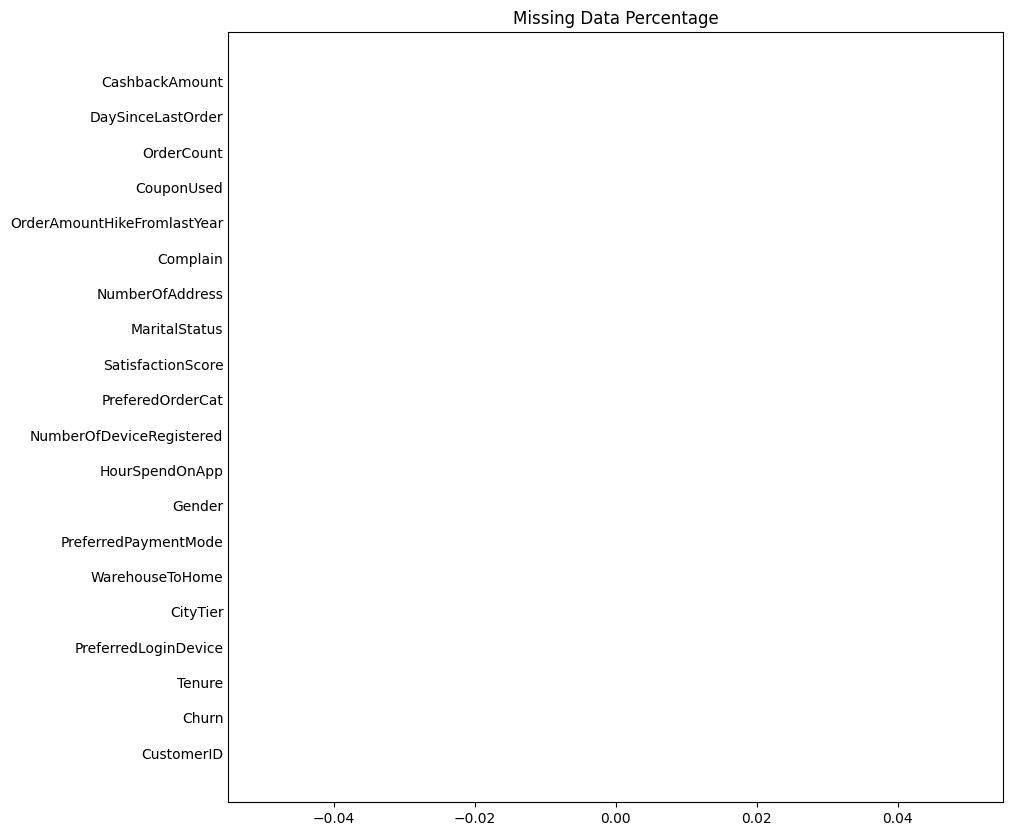

In [ ]:
#Null Values
plt.figure(figsize=(10,10))
plt.barh(missing_value_data['column_name'], missing_value_data['percent_missing'])
plt.tick_params(axis='y', which='both', length=0)
plt.title('Missing Data Percentage')
plt.show()

In [ ]:
data['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [ ]:
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].str.replace('Cash on Delivery','COD')
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].str.replace('Credit Card','CC')

In [ ]:
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice','Gender','PreferedOrderCat','MaritalStatus','CityTier']
num_cols = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','OrderAmountHikeFromlastYear',
           'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

In [ ]:
data.Churn.mean()

0.16838365896980462

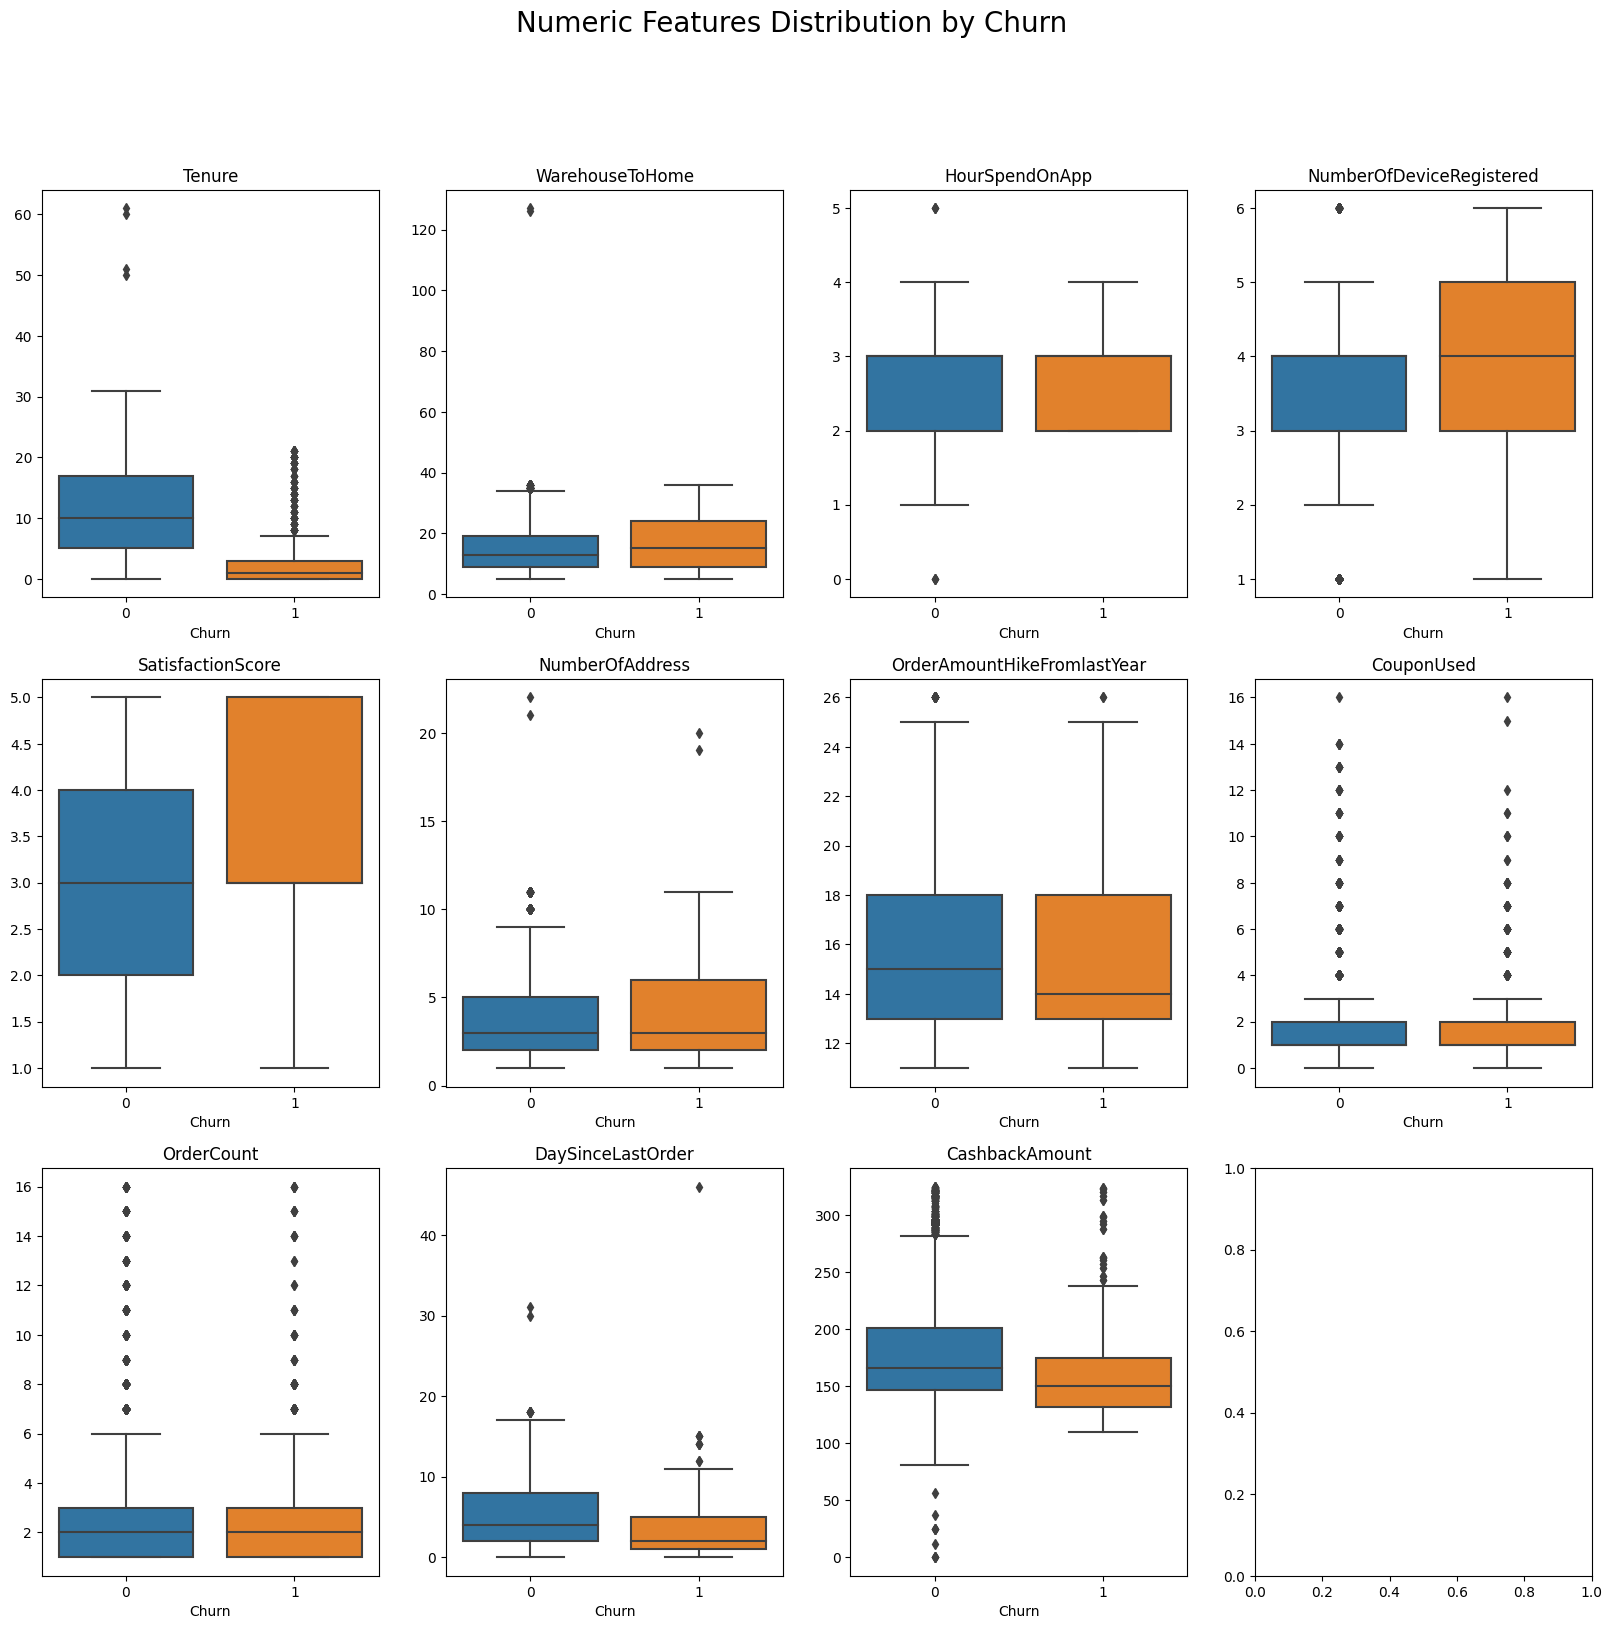

In [ ]:
#Data Visulization
fig, ax = plt.subplots(3,4,figsize=(20, 18))
fig.suptitle('Numeric Features Distribution by Churn', fontsize=20)
ax = ax.flatten()
for idx,c in enumerate(num_cols):
    df_t = data[data[c].notnull()].copy()
    ax[idx].set_title(c)
    sns.boxplot(x='Churn', y=c, data=df_t, ax=ax[idx])
    ax[idx].set_ylabel('')
plt.show()

<Axes: >

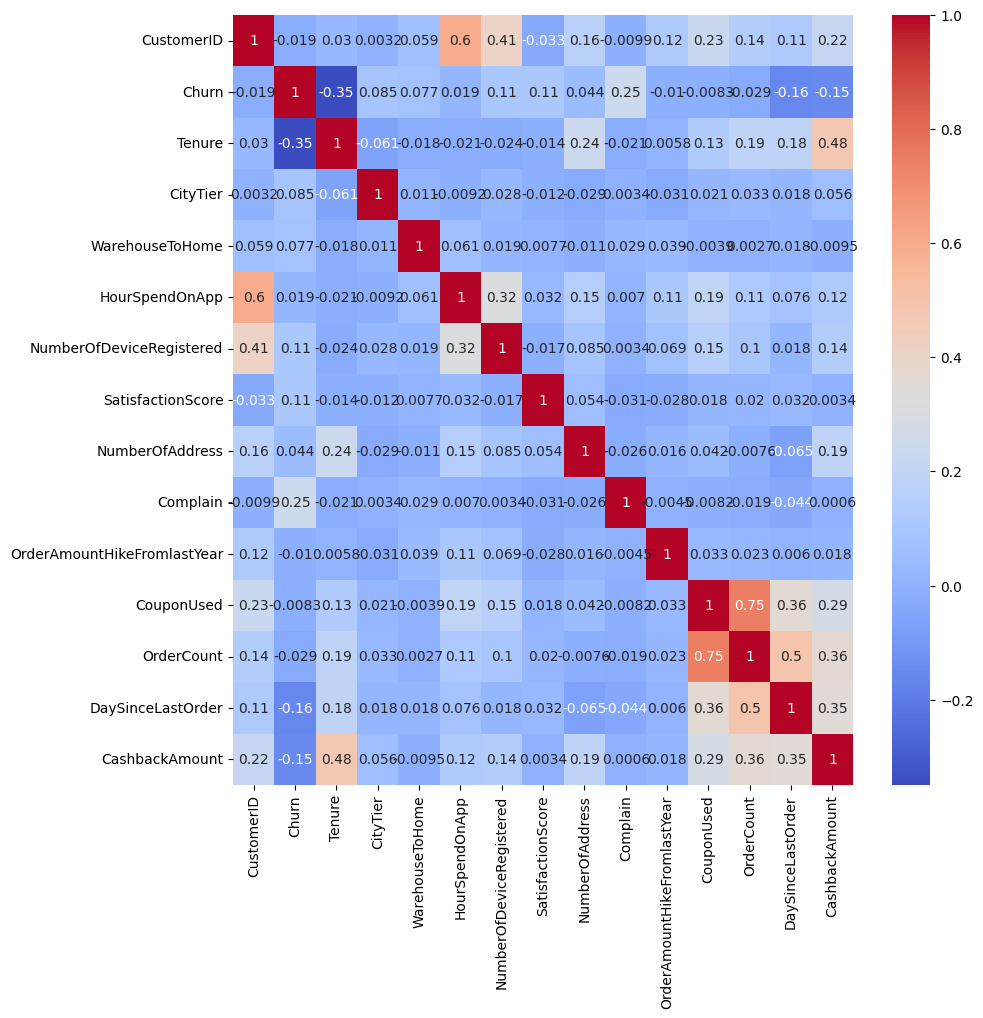

In [ ]:
#Heat Map
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

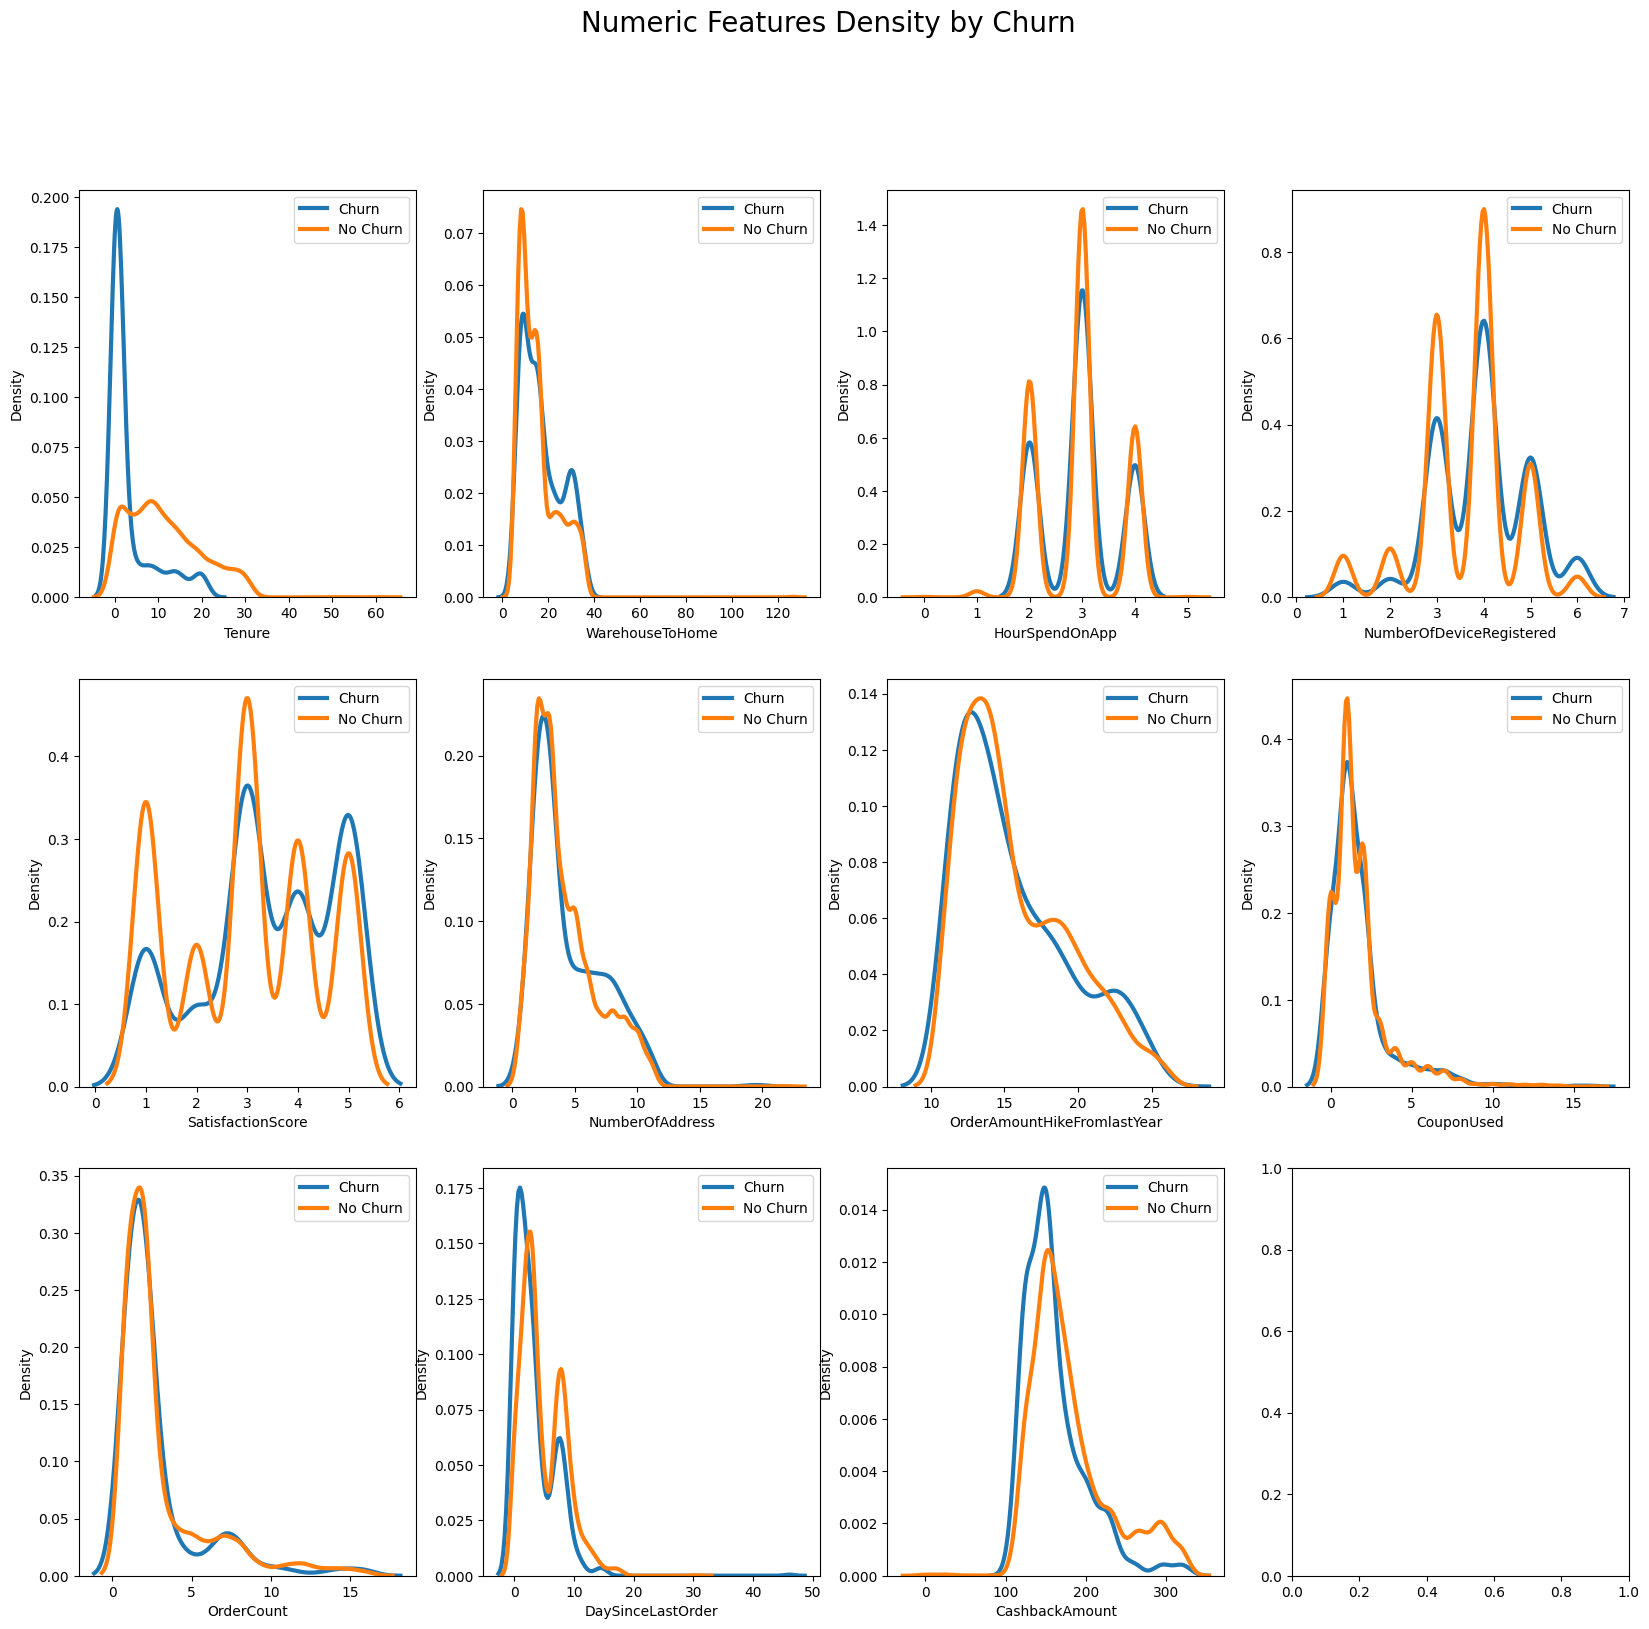

In [ ]:
df_c = data[data['Churn']==1].copy()
df_nc = data[data['Churn']==0].copy()

fig, ax = plt.subplots(3,4,figsize=(20, 18))
fig.suptitle('Numeric Features Density by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

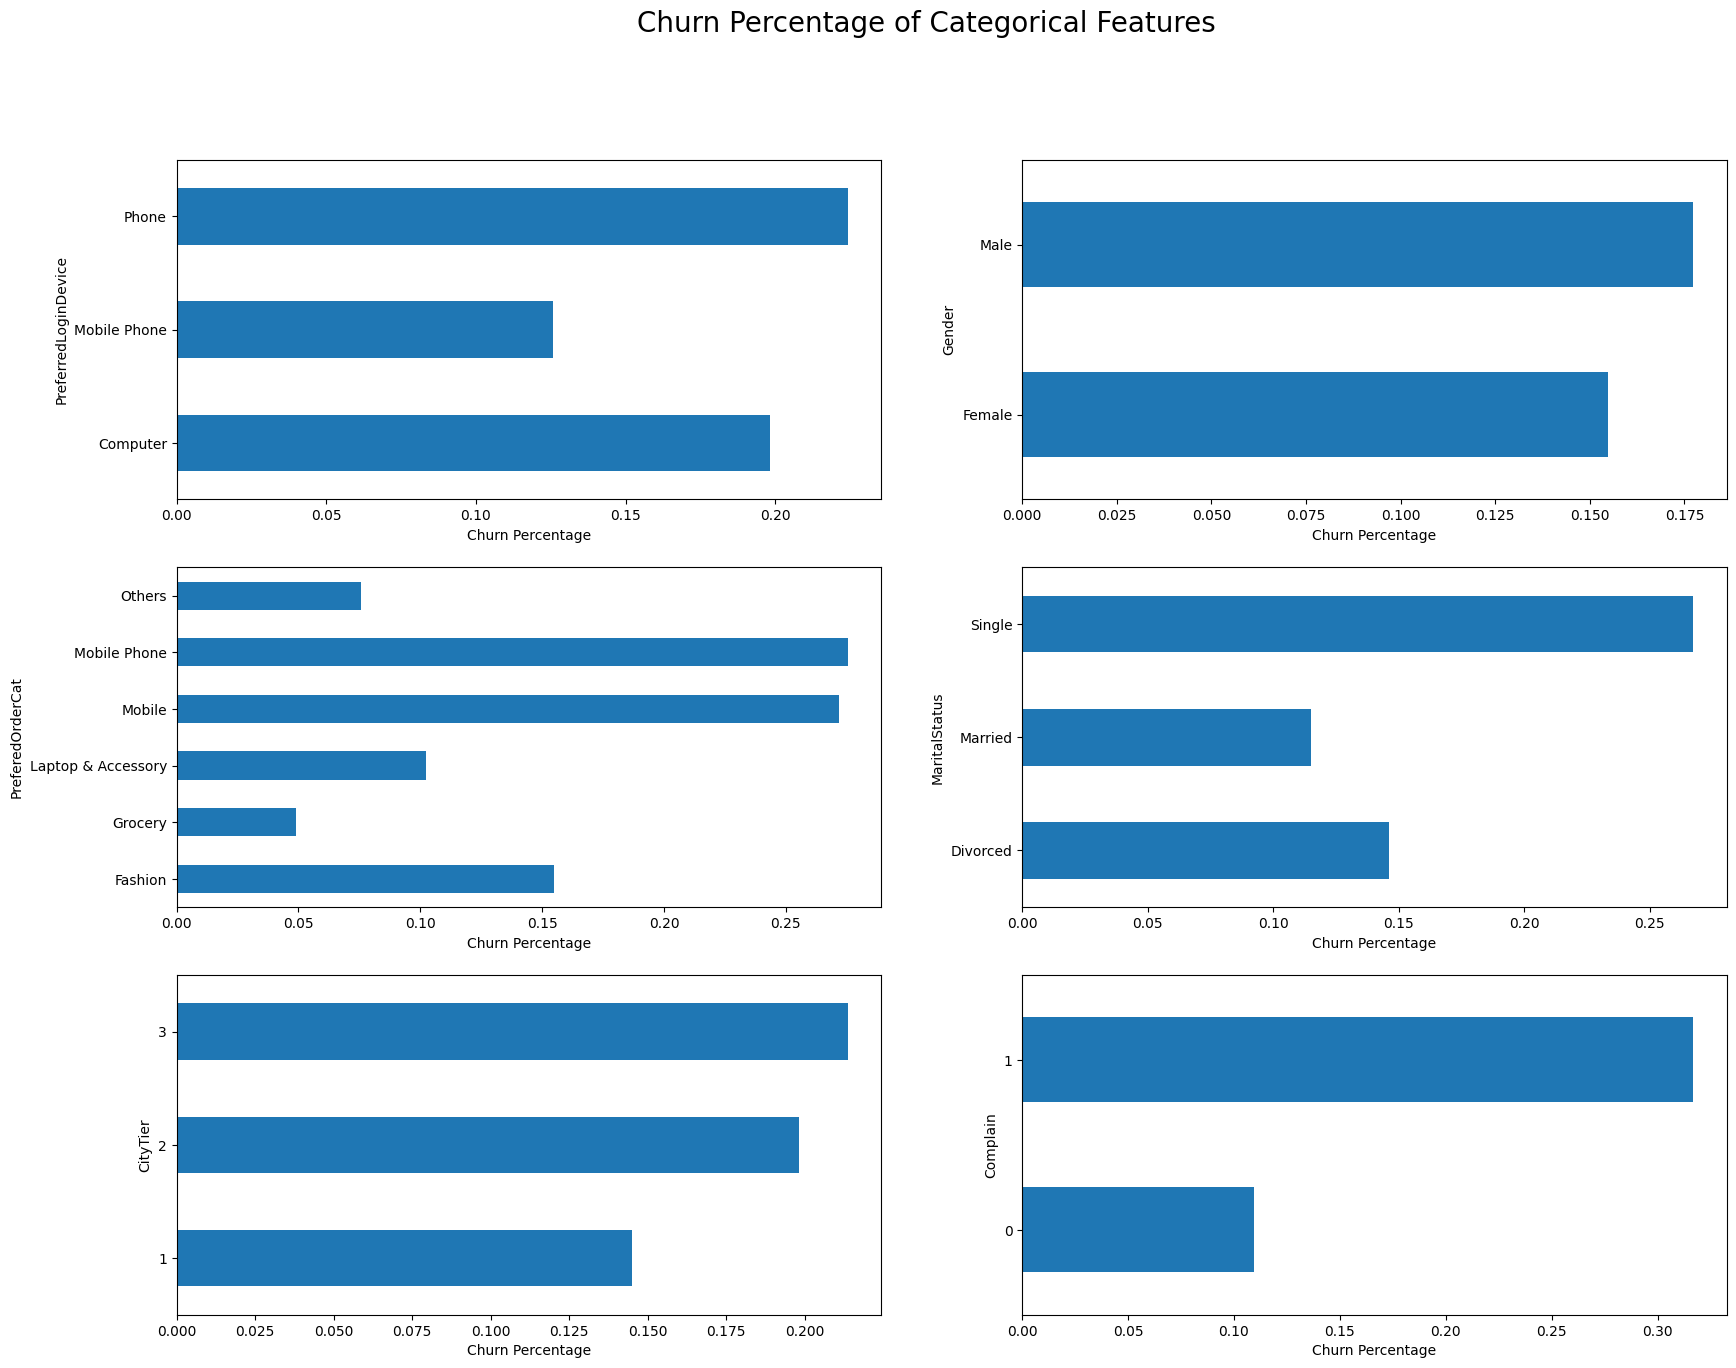

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(20, 15))
fig.suptitle('Churn Percentage of Categorical Features', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(cat_cols+binary_cat_cols):
    data.groupby(c).Churn.mean().plot.barh(ax=ax[idx])
    ax[idx].set_xlabel('Churn Percentage')
plt.show()

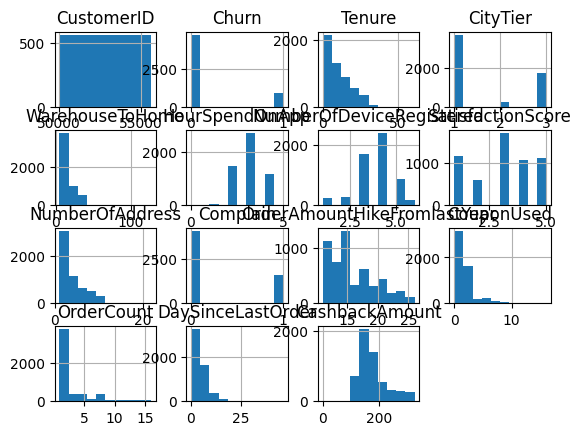

In [ ]:
hist = data.hist()

In [ ]:
#Impute Missing Values (Replacing null values with median)
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

In [ ]:
#removing Outliers
def remove_outlier(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)

    data[col]=np.where(data[col]>ur,ur,data[col])
    data[col]=np.where(data[col]<lr,lr,data[col])

    return data

for c in num_cols:
    data = remove_outlier(data, c)

#Exporting updated file
data.to_csv('eCommerce updated.csv')

In [ ]:
#One Hot Encoding
#Removing Spaces & Special Chracters
data = data.replace(' ', '_', regex=True)
data = data.replace('&', 'And', regex=True)
data_encoded = pd.get_dummies(data,drop_first=True)
data_encoded.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile_Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Debit_Card',
       'PreferredPaymentMode_E_wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop_And_Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile_Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [ ]:
#Spliting Dataset in 80(Train) 20(Test)
X = data_encoded[['Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile_Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Debit_Card',
       'PreferredPaymentMode_E_wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop_And_Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile_Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single']].copy()
y = data_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=42)

#Min Max Scaling
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

print(type(rfc))
scores = cross_val_score(rfc,X_train,y_train,cv=5, scoring='roc_auc')
print ("Random Forest Efficiency:",scores.mean())
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Random Forest Efficiency: 0.9768726840625291
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       941
           1       1.00      0.83      0.91       185

    accuracy                           0.97      1126
   macro avg       0.98      0.91      0.94      1126
weighted avg       0.97      0.97      0.97      1126



In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
scores_dt = cross_val_score(dt, X_train, y_train, cv=5, scoring='roc_auc')
efficiency_dt = scores_dt.mean()
print("Decision Tree Efficiency: ", efficiency_dt)
print(classification_report(y_test, pred_dt))

Decision Tree Efficiency:  0.8994550019325054
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       941
           1       0.88      0.91      0.90       185

    accuracy                           0.97      1126
   macro avg       0.93      0.94      0.94      1126
weighted avg       0.97      0.97      0.97      1126



In [ ]:
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)

print(type(adaboost))

scores_adaboost = cross_val_score(adaboost, X_train, y_train, cv=5, scoring='roc_auc')
efficiency_adaboost = scores_adaboost.mean()
print("AdaBoost Efficiency:", efficiency_adaboost)

pred_adaboost = adaboost.predict(X_test)

print(classification_report(y_test, pred_adaboost))

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
AdaBoost Efficiency: 0.9088231310916968
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       941
           1       0.84      0.58      0.69       185

    accuracy                           0.91      1126
   macro avg       0.88      0.78      0.82      1126
weighted avg       0.91      0.91      0.91      1126



In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical.fit(X_train)

silhouette_avg = silhouette_score(X_train, hierarchical.labels_)

print("Hierarchical Clustering Efficiency (Silhouette Coefficient):", silhouette_avg)


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_train, kmeans.labels_)

print("K-means Clustering Efficiency (Silhouette Coefficient):", silhouette_avg)


In [ ]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

print(type(svm))

scores_svm = cross_val_score(svm, X_train, y_train, cv=5, scoring='roc_auc')
efficiency_svm = scores_svm.mean()
print("SVM Efficiency:", efficiency_svm)

pred_svm = svm.predict(X_test)

print(classification_report(y_test, pred_svm))


<class 'sklearn.svm._classes.SVC'>
SVM Efficiency: 0.880869045222588
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       941
           1       0.00      0.00      0.00       185

    accuracy                           0.84      1126
   macro avg       0.42      0.50      0.46      1126
weighted avg       0.70      0.84      0.76      1126



In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

print(type(lr))
scores = cross_val_score(lr,X_train,y_train,cv=5,scoring='roc_auc')
print ("Logistic Regression Efficiency:",scores.mean())
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(classification_report(y_test, pred))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Logistic Regression Efficiency: 0.8782461189647567
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       941
           1       0.80      0.54      0.64       185

    accuracy                           0.90      1126
   macro avg       0.86      0.75      0.79      1126
weighted avg       0.90      0.90      0.89      1126



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)

print("Final ANN Accuracy:", accuracy)

y_pred_ann = model.predict(X_test)
y_pred_ann = [1 if pred >= 0.5 else 0 for pred in y_pred_ann]
print(classification_report(y_test, y_pred_ann))

Epoch 1/10
113/113 [==============================] - 2s 4ms/step - loss: 0.7515 - accuracy: 0.8124 - val_loss: 0.4985 - val_accuracy: 0.8113
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.8510 - val_loss: 0.3293 - val_accuracy: 0.8568
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 0.3379 - accuracy: 0.8662 - val_loss: 0.3107 - val_accuracy: 0.8668
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.8579 - val_loss: 0.3321 - val_accuracy: 0.8602
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8573 - val_loss: 0.2993 - val_accuracy: 0.8779
Epoch 6/10
113/113 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8571 - val_loss: 0.3091 - val_accuracy: 0.8668
Epoch 7/10
113/113 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8751 - val_loss: 0.2990 - val_accuracy: 0.8690
Epoch 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

nb = GaussianNB()
nb.fit(X_train_norm, y_train)
pred_nb = nb.predict(X_test_norm)
scores_nb = cross_val_score(nb, X_train_norm, y_train, cv=5, scoring='roc_auc')
efficiency_nb = scores_nb.mean()

print("Naive Bayes Efficiency:", efficiency_nb)
print(classification_report(y_test, pred_nb))


Naive Bayes Efficiency: 0.7991249025074447
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       941
           1       0.37      0.72      0.49       185

    accuracy                           0.75      1126
   macro avg       0.65      0.74      0.66      1126
weighted avg       0.84      0.75      0.78      1126

